In [1]:
#Necessary imports
import sumolib
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import random

import torch
import torch_geometric
import torch_geometric.data as Data
import torch_geometric.utils as pyg_utils

import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import numpy as np
import json
import sys

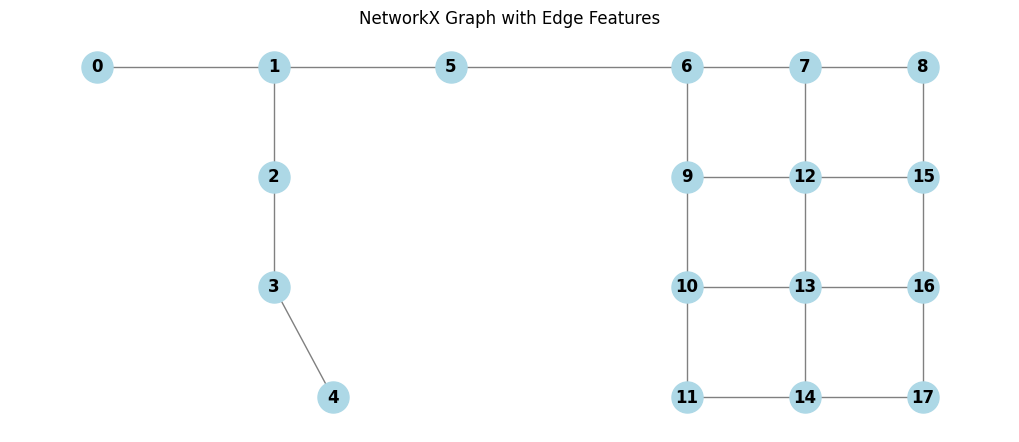

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Node data: Node ID, x, y coordinates
nodes = {
    0: (0, 3), 1: (1.5, 3), 2: (1.5, 2), 3: (1.5, 1), 4: (2, 0),
    5: (3, 3), 6: (5, 3), 7: (6, 3), 8: (7, 3), 9: (5, 2),
    10: (5, 1), 11: (5, 0), 12: (6, 2), 13: (6, 1), 14: (6, 0),
    15: (7, 2), 16: (7, 1), 17: (7, 0)
}

# Edge data: Node1 ID, Node2 ID
edges = [
    (0, 1), (1, 2), (2, 3), (3, 4), (1, 5), (5, 6), (6, 7), (7, 8),
    (6, 9), (9, 10), (10, 11), (7, 12), (12, 13), (13, 14), (8, 15),
    (15, 16), (16, 17), (9, 12), (10, 13), (11, 14), (12, 15), (13, 16), (14, 17)
]

# Initialize the graph and add nodes with positions
G = nx.Graph()
for node_id, (x, y) in nodes.items():
    G.add_node(node_id, pos=(x, y))

# Add edges with empty attributes for is_chosen, weight, leader_sign, connects_leaders
for (node1, node2) in edges:
    G.add_edge(node1, node2, is_chosen=None, weight=None, is_leader=None, leader_sign=None, connects_leaders=[])

# Get positions for plotting
pos = nx.get_node_attributes(G, 'pos')


# Plot the graph
plt.figure(figsize=(10, 4))
nx.draw(G, pos, with_labels=True, node_size=500, node_color="lightblue", font_weight="bold", edge_color="gray")
plt.title("NetworkX Graph with Edge Features")
plt.show()


In [5]:
G.edges[0, 1]['is_leader'] = True
G.edges[3,4]['is_leader'] = False
G.edges[3,4]['leader_sign'] = 2
edges_to_change = [[0,1],[1,5],[5,6],[1,2],[2,3], [3,4]]
for edge in edges_to_change:
    G.edges[edge[0],edge[1]]['leader_sign'] = 1

#G.edges[node1, node2][feature_name] = new_value

In [3]:
print(G.edges)
list = [(0, 1), (1, 2), (1, 5), (2, 3), (3, 4), (5, 6), (6, 7), (6, 9), (7, 8), (7, 12), (8, 15), (9, 10), (9, 12), (10, 11), (10, 13), (11, 14), (12, 13), (12, 15), (13, 14)]
len(list)

[(0, 1), (1, 2), (1, 5), (2, 3), (3, 4), (5, 6), (6, 7), (6, 9), (7, 8), (7, 12), (8, 15), (9, 10), (9, 12), (10, 11), (10, 13), (11, 14), (12, 13), (12, 15), (13, 14), (13, 16), (14, 17), (15, 16), (16, 17)]


19

In [16]:
def plot_graph_with_features(G,filename, color_feature="leader_sign", label_feature="leader_sign"):
    # Node positions
    pos = nx.get_node_attributes(G, 'pos')
    
    # Get edge colors based on the feature
    edge_colors = []
    for u, v, data in G.edges(data=True):
        # Assign color based on feature (e.g., 'leader_sign' -> green for 1, black otherwise)
        if color_feature in data: #data[color_feature] is not None
            if data[color_feature] == 1:
                edge_colors.append("gray")
            elif data[color_feature] == 2:
                edge_colors.append('gray')            
            else:
                edge_colors.append("gray")  # Default color if no value
    edge_colors[0] = 'black'
    edge_colors[12] = 'black'
    edge_colors[18] = 'black'
    edge_colors[5] = 'red' #Ezt kell először pirosra állítani
    edge_colors[2] = 'red'
    #edge_colors[4] = 'red'
    #edge_colors[6] = 'red'
    edge_colors[7] = 'red'
    edge_colors[9] = 'red'
    edge_colors[16] = 'red' #Ezt kell másodszor pirosra állítani
    # Define edge labels based on another feature with offsets
    edge_labels = {}
    for u, v, data in G.edges(data=True):
        if label_feature in data and data[label_feature] != 0:
            edge_labels[(u, v)] = data[label_feature]
    # Plot the graph
    plt.figure(figsize=(10, 4))
    nx.draw(G, pos, with_labels=True, node_size=500, node_color="lightblue",
            font_weight="bold", edge_color=edge_colors, width=4)
    
    # Add edge labels with offset positions
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_color="blue", font_size = 14)
    
    plt.title("Choosing the roads sixth step")
    plt.savefig('../Témalabor2/figures/strategy/'+filename)
    plt.show()


In [17]:
G.edges[0, 1]['is_leader'] = True
G.edges[0,1]['connects_leaders'] = []
G.edges[3,4]['is_leader'] = False
G.edges[3,4]['leader_sign'] = 2
edges_to_change = [[0,1],[1,5],[5,6],[1,2],[2,3]]
for edge in edges_to_change:
    G.edges[edge[0],edge[1]]['leader_sign'] = 1
G.edges[9,12]['is_leader'] = True
G.edges[9,12]['connects_leaders'] = []
edges_to_change = [[6,9], [9,10], [12,13], [7,12], [12,15], [9,12],[6,7], [7,8],[8,15], [3,4]]
for edge in edges_to_change:
    G.edges[edge[0],edge[1]]['leader_sign'] = None
G.edges[13,14]['is_leader'] = True
G.edges[13,14]['connects_leaders'] = []
edges_to_change = [[10,13], [13,16], [13,14], [11,14], [14,17],[10,11], [15,16], [16,17]]
for edge in edges_to_change:
    G.edges[edge[0],edge[1]]['leader_sign'] = None
#G.edges[node1, node2][feature_name] = new_value
G.edges[1,5]['connects_leaders'] = []
G.edges[5,6]['connects_leaders'] = []
G.edges[6,9]['connects_leaders'] = []
G.edges[6,7]['connects_leaders'] = []
G.edges[7,12]['connects_leaders'] = []
G.edges[12,13]['connects_leaders'] = []

In [18]:
for edge in G.edges:
    G.edges[edge]['weight'] = 0
G.edges[0,1]['weight'] = 17
G.edges[9,12]['weight'] = 25
G.edges[13,14]['weight'] = 24
G.edges[6,7]['weight'] = 0
G.edges[6,9]['weight'] = 0
G.edges[7,12]['weight'] = 0

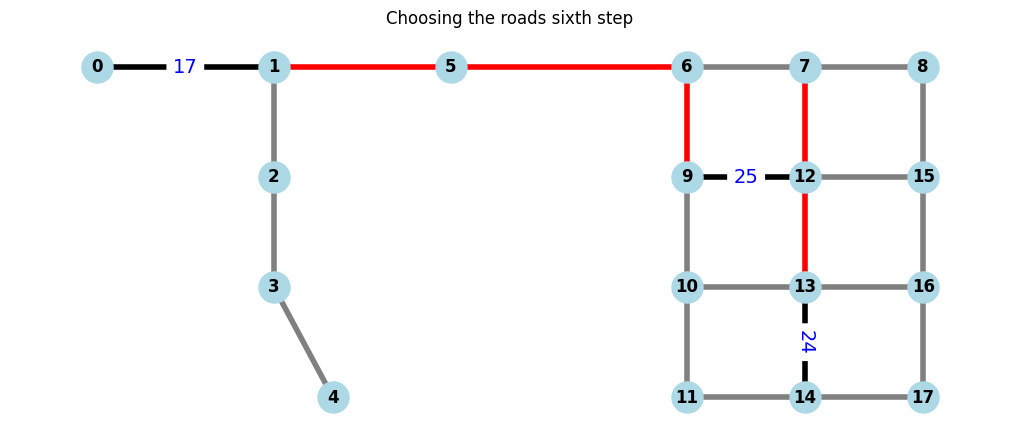

In [19]:
plot_graph_with_features(G,'choosing_the_roads_sixth_step.png', color_feature="leader_sign", label_feature="weight")

In [31]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_graph_with_offset_labels(G, color_feature="leader_sign", label_feature="leader_sign"):
    # Node positions
    pos = nx.get_node_attributes(G, 'pos')
    
    # Get edge colors based on the feature
    edge_colors = []
    for u, v, data in G.edges(data=True):
        # Assign color based on feature (e.g., 'is_chosen' -> red for True, gray for False)
        if color_feature in data and data[color_feature] is not None:
            edge_colors.append("red" if data[color_feature]==1 else "green")
        else:
            edge_colors.append("black")  # Default color if no value
    
    # Define edge labels based on another feature with offsets
    edge_labels = {}
    offset_pos = {}  # Adjusted positions for labels
    for u, v, data in G.edges(data=True):
        if label_feature in data and data[label_feature] is not None:
            # Compute the midpoint of the edge
            x_mid = (pos[u][0] + pos[v][0]) / 2
            y_mid = (pos[u][1] + pos[v][1]) / 2
            # Offset the label position
            offset_pos[(u, v)] = (x_mid + 0.1, y_mid + 0.1)  # Adjust as needed
            print(offset_pos[(u,v)])
            edge_labels[(u, v)] = data[label_feature]
    
    # Plot the graph
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_size=500, node_color="lightblue",
            font_weight="bold", edge_color=edge_colors, width=2)
    
    # Draw edge labels with offset
    nx.draw_networkx_edge_labels(G, offset_pos, edge_labels=edge_labels, font_color="blue")
    
    plt.title("Network Graph with Colored Edges and Offset Feature Labels")
    plt.show()


In [52]:
G.edges
#plot_graph_with_offset_labels(G, color_feature="leader_sign", label_feature="leader_sign")

EdgeView([(0, 1), (1, 2), (1, 5), (2, 3), (3, 4), (5, 6), (6, 7), (6, 9), (7, 8), (7, 12), (8, 15), (9, 10), (9, 12), (10, 11), (10, 13), (11, 14), (12, 13), (12, 15), (13, 14), (13, 16), (14, 17), (15, 16), (16, 17)])